# Παίγνια σε Κανονική Μορφή με Βιβλιοθήκες Nashpy και QuantEcon   

Παρακάτω, δίνουμε παραδείγματα εισαγωγής, χειρισμού και υπολογισμού ισορροπιών για παίγνια σε κανονική μορφή (normal form) με τις βιβλιοθήκες **Nashpy** και **QuantEcon**. 

Για περισσότερα παραδείγματα και αναλυτική περιγραφή των δυνατοτήτων αυτών των βιβλιοθηκών, δείτε την τεκμηρίωση της [NashPy](https://nashpy.readthedocs.io) και την τεκμηρίωση της [QuantEcon](https://quanteconpy.readthedocs.io). 

Άλλα χρήσιμα εργαλεία για την ανάλυση παιγνίων σε κανονική και σε εκτεταμένη μορφή είναι το λογισμικό [Game Theory Explorer](https://gte.csc.liv.ac.uk/index), το οποίο μπορείτε να χρησιμοποιήσετε και μέσω [web interface](http://app.test.logos.bg), και το λογισμικό [Gambit](https://gambitproject.readthedocs.io), το οποίο περιλαμβάνει [graphical user interface](https://gambitproject.readthedocs.io/en/latest/gui.html#section-gui), λειτουργίες προσβάσιμες από τη [γραμμή εντολών](https://gambitproject.readthedocs.io/en/latest/tools.html#command-line) και [Python interface](https://gambitproject.readthedocs.io/en/latest/pyapi.html#python-api), το οποίο μπορεί να χρησιμοποιηθεί και από python notebooks, όπως αυτό. Σε αυτή τη σύντομη εισαγωγή στη Θεωρία Παιγνίων, δεν θα αναφερθούμε στις δυνατότητες των **Game Theory Explorer** και **Gambit**.

## Εγκατάσταση Nashpy

Αρχικά εγκαθιστούμε τη βιβλιοθήκη Nashpy.

In [1]:
pip install nashpy

Note: you may need to restart the kernel to use updated packages.


## Παίγνια σε Κανονική Μορφή: Ορολογία και Παραδείγματα

Ένα **παίγνιο σε κανονική μορφή** ([normal form game](https://en.wikipedia.org/wiki/Normal-form_game)) αποτελείται από:
- ένα σύνολο παικτών $N = \{1, 2, \ldots, n \}$,
- ένα σύνολο (αμιγών) στρατηγικών $S^i$ για κάθε παίκτη $i$, και
- μια συνάρτηση ωφέλειας $u_i : S^1 \times \cdots \times S^n \to \mathbb{R}$ για κάθε παίκτη $i$.

Για παίγνια **2 παικτών** (στα οποία θα εστιάσουμε σε αυτό το notebook), οι συναρτήσεις ωφέλειας δίνονται συνήθως ως δύο πίνακες $(A, B)$ ([bimatrix game](https://en.wikipedia.org/wiki/Bimatrix_game)). 

Αν ο παίκτης 1 (Π1) έχει $n$ στρατηγικές και ο παίκτης 2 (Π2) έχει $m$ στρατηγικές, οι πίνακες $A$ και $B$ έχουν διαστάσεις $n \times m$. Αν ο Π1 επιλέξει τη στρατηγική $i$, $i \in \{ 1, \ldots, n\}$ και ο Π2 επιλέξει τη στρατηγική $j$, $j \in \{1, \ldots, m\}$, η ωφέλεια του Π1 είναι $A[i, j]$ και η ωφέλεια του Π2 είναι $B[i, j]$. Για αυτό και συχνά λέμε ότι ο Π1 είναι ο **παίκτης-γραμμή** (αφού ο Π1 επιλέγει τη γραμμή που καθορίζει την ωφέλεια των δύο παικτών στους πίνακες $A$ και $Β$) και o Π2 είναι ο **παίκτης-στήλη** (αφού αντίστοιχα ο Π2 επιλέγει τη στήλη που καθορίζει την ωφέλεια των δύο παικτών στους πίνακες $A$ και $Β$). 

Όταν $A+B = 0$, έχουμε παίγνιο 2 παικτών με [**μηδενικό άθροισμα**](https://en.wikipedia.org/wiki/Zero-sum_game) (2-person zero-sum game), οι συναρτήσεις ωφέλειας δίνονται συνήθως από έναν $n\times m$ πίνακα $A$, με την ωφέλεια του Π1 να καθορίζεται από τον $A$ και την ωφέλεια του Π2 να καθορίζεται από τον αντίθετο πίνακα $-A$.

Εισάγουμε παρακάτω κάποια τυπικά παραδείγματα παιγνίων με 2 παίκτες σε κανονική μορφή. Κάθε παίγνιο δίνεται ως ένας πίνακας όπου:
- Οι γραμμές επιγράφονται με τις στρατηγικές του Π1 (ή παίκτη-γραμμή)
- Οι στήλες επιγράφονται με τις στρατηγικές του Π2 (ή παίκτη-στήλη)
- Κάθε κελί του πίνακα περιέχει ένα ζεύγος αριθμών $(a, b)$, όπου $a$ είναι η ωφέλεια του Π1 και $b$ η ωφέλεια του Π2 στη συγκεκριμένη κατάσταση του παιγνίου. 

### Πέτρα - Ψαλίδι - Χαρτί 

$$\begin{array}{||c|c|c|c||}\hline
\ \ \ &\ \mbox{Πέτρα}\ &\ \mbox{Ψαλίδι}\ &\ \mbox{Χαρτί}\ \\ \hline
\ \mbox{Πέτρα} \ &\ (0, 0)\ &\ (1, -1)\ &\ (-1, 1)\ \\ \hline
\ \mbox{Ψαλίδι} \ &\ (-1, 1)\ &\ (0, 0)\ &\ (1, -1)\ \\ \hline
\ \mbox{Χαρτί} \ &\ (1, -1)\ &\ (-1, 1)\ &\ (0,0)\ \\ \hline\hline
\end{array}$$

Περισσότερες πληροφορίες για το [Πέτρα-Ψαλίδι-Χαρτί](https://en.wikipedia.org/wiki/Rock_paper_scissors).
Το Πέτρα-Ψαλίδι-Χαρτί είναι παίγνιο μηδενικού αθροίσματος και μπορεί να ορισθεί στη Nashpy ως εξής:

In [2]:
import nashpy as nash
import numpy as np

A = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
rsp = nash.Game(A)
print(rsp)

Zero sum game with payoff matrices:

Row player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]

Column player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]


### Γενικευμένη Εκδοχή του Πέτρα - Ψαλίδι - Χαρτί 

$$\begin{array}{||c|c|c|c||}\hline
\ \ \ &\ \mbox{Πέτρα}\ &\ \mbox{Ψαλίδι}\ &\ \mbox{Χαρτί}\ \\ \hline
\ \mbox{Πέτρα} \ &\ (0, 0)\ &\ (2, 1)\ &\ (1, 2)\ \\ \hline
\ \mbox{Ψαλίδι} \ &\ (1, 2)\ &\ (0, 0)\ &\ (2, 1)\ \\ \hline
\ \mbox{Χαρτί} \ &\ (2, 1)\ &\ (1, 2)\ &\ (0,0)\ \\ \hline\hline
\end{array}$$

Η γενικεύμενη εκδοχή του Πέτρα-Ψαλίδι-Χαρτί οφείλεται στον [Lloyd Shapley](https://en.wikipedia.org/wiki/Lloyd_Shapley) και μπορεί να ορισθεί στη Nashpy ως εξής:

In [3]:
A = np.array([[0, 2, 1], [1, 0, 2], [2, 1, 0]])
B = np.array([[0, 1, 2], [2, 0, 1], [1, 2, 0]])
gen_rsp = nash.Game(A, B)
print(gen_rsp)

Bi matrix game with payoff matrices:

Row player:
[[0 2 1]
 [1 0 2]
 [2 1 0]]

Column player:
[[0 1 2]
 [2 0 1]
 [1 2 0]]


### Δίλημμα του Φυλακισμένου

$$\begin{array}{||c|c|c||}\hline
\ \ \ &\ \mbox{Ομολογώ}\ &\ \mbox{Δεν Ομολογώ}\ \\ \hline
\ \mbox{Ομολογώ} \ &\ (-5, -5)\ &\ (0, -12)\ \\ \hline
\ \mbox{Δεν Ομολογώ} \ &\ (-12, 0)\ &\ (-1, -1)\ \\ \hline
\end{array}$$

Περισσότερες πληροφορίες για το [Δίλημμα του Φυλακισμένου](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma).
Το Δίλημμα του Φυλακισμένου μπορεί να ορισθεί στη Nashpy ως εξής:

In [4]:
A = np.array([[-5, 0], [-12, -1]])
B = np.array([[-5, -12], [0, -1]])
prisoners_dilemma = nash.Game(A, B)
print(prisoners_dilemma)

Bi matrix game with payoff matrices:

Row player:
[[ -5   0]
 [-12  -1]]

Column player:
[[ -5 -12]
 [  0  -1]]


### Bach or Stravinski (ή Battle of Sexes, BoS)

$$\begin{array}{||c|c|c||}\hline
\ \ \ &\ \mbox{Bach}\ &\ \mbox{Stravinski}\ \\ \hline
\ \mbox{Bach} \ &\ (2, 1)\ &\ (0, 0)\ \\ \hline
\ \mbox{Stravinski} \ &\ (0, 0)\ &\ (1, 2)\ \\ \hline
\end{array}$$

Περισσότερες πληροφορίες για το [Battle of Sexes](https://en.wikipedia.org/wiki/Battle_of_the_sexes_(game_theory)).
Το Bach or Stravinski (ή Battle of Sexes) μπορεί να ορισθεί στη Nashpy ως εξής:

In [5]:
A = np.array([[2, 0], [0, 1]])
B = np.array([[1, 0], [0, 2]])
BoS = nash.Game(A, B)
print(BoS)

Bi matrix game with payoff matrices:

Row player:
[[2 0]
 [0 1]]

Column player:
[[1 0]
 [0 2]]


### Κοινωνική Συνεργασία (Stag Hunt)

$$\begin{array}{||c|c|c||}\hline
\ \ \ &\ \mbox{Συνεργασία}\ &\ \mbox{Αποστασία}\ \\ \hline
\ \mbox{Συνεργασία} \ &\ (2, 2)\ &\ (0, 3)\ \\ \hline
\ \mbox{Αποστασία} \ &\ (3, 0)\ &\ (1, 1)\ \\ \hline
\end{array}$$

Περισσότερες πληροφορίες για το [Stag Hunt](https://en.wikipedia.org/wiki/Stag_hunt).
Το Stag Hunt μπορεί να ορισθεί στη Nashpy ως εξής:

In [6]:
A = np.array([[2, 0], [3, 1]])
B = np.array([[2, 3], [0, 1]])
stag_hunt = nash.Game(A, B)
print(stag_hunt)

Bi matrix game with payoff matrices:

Row player:
[[2 0]
 [3 1]]

Column player:
[[2 3]
 [0 1]]


### Μοιράζοντας 2 Ευρώ

Δύο αδέλφια θέλουν να μοιραστούν 2 κέρματα του ενός ευρώ που έχουν πάρει από τη μητέρα τους. Ο Π1 (μεγάλος αδελφός, παίκτης-γραμμή) προτείνει μια μοιρασιά και ο Π2 (μικρός αδελφός, παίκτης-στήλη) αποδέχεται ή όχι. Αν ο μικρός συμφωνήσει, τα αδέλφια μοιράζουν τα δύο κέρματα όπως πρότεινε ο μεγάλος. Αν ο μικρός διαφωνήσει, τα κέρματα επιστρέφουν στη μητέρα, η οποία αποζημιώνει με μισό ευρώ τον αδικημένο στη μοιρασιά που πρότεινε ο μεγάλος.

$$\begin{array}{||c|c|c||}\hline
\ \ \ &\ \mbox{Ναι}\ &\ \mbox{Όχι}\ \\ \hline
\ \mbox{$2 - 0$} \ &\ (2, 0)\ &\ (0, 1/2)\ \\ \hline
\ \mbox{$1 - 1$} \ &\ (1, 1)\ &\ (0, 0)\ \\ \hline
\ \mbox{$0 - 2$} \ &\ (0, 2)\ &\ (1/2, 0)\ \\ \hline
\end{array}$$

Το παραπάνω παίγνιο διαμοιρασμού αγαθών μπορεί να ορισθεί στη Nashpy ως εξής:

In [7]:
A = np.array([[2, 0], [1, 0], [0, 0.5]])
B = np.array([[0, 0.5], [1, 0], [2, 0]])
sharing = nash.Game(A, B)
print(sharing)

Bi matrix game with payoff matrices:

Row player:
[[2.  0. ]
 [1.  0. ]
 [0.  0.5]]

Column player:
[[0.  0.5]
 [1.  0. ]
 [2.  0. ]]


### Άσκηση 1

Στη [σχετική σελίδα του Wikipedia](https://en.wikipedia.org/wiki/List_of_games_in_game_theory) μπορείτε να βρείτε κατάλογο με πολλά τυπικά παραδείγματα παιγνίων. Να επιλέξετε **τρία από αυτά** και να τα ορίσετε στην Nashpy, όπως παραπάνω. 

# Ισορροπία Nash στις Αμιγείς Στρατηγικές

**Ισορροπία Nash στις αμιγείς στρατηγικές** (ή αμιγής ισορροπία Nash, pure [Nash equilibrium](https://en.wikipedia.org/wiki/Nash_equilibrium)) ενός παιγνίου σε κανονική μορφή με $n$ παίκτες είναι μια κατάσταση $\vec{s} = (s_1, \ldots, s_n) \in S^1 \times \cdots \times S^n$ του παιγνίου όπου για κάθε παίκτη $i \in \{ 1, \ldots, n\}$ ισχύει ότι: 

$$u_i(s_i, \vec{s}_{–i}) \geq u_i(s’, \vec{s}_{–i}) \mbox{ για κάθε $s’\in S^i$}$$ 

Δηλαδή, σε μια ισορροπία Nash, κανένας παίκτης δεν μπορεί να βελτιώσει την ατομική του ωφέλεια αλλάζοντας μόνο τη δική του στρατηγική.

**Βέλτιστη απόκριση** ([best reponse](https://en.wikipedia.org/wiki/Best_response)) ενός παίκτη $i$ στις (αμιγείς) στρατηγικές $\vec{s}_{–i}$ των άλλων παικτών είναι κάθε στρατηγική $s \in S^i$ που βελτιστοποιεί την ατομική ωφέλεια του παίκτη $i$, δεδομένου ότι οι άλλοι παίκτες ακολουθούν τις στρατηγικές $\vec{s}_{–i}$. Δηλαδή, βέλτιστη απόκριση ενός παίκτη $i$ στο $\vec{s}_{–i}$ είναι κάθε στρατηγική

$$s = \arg\max_{x \in S^i} \{ u_i(x, \vec{s}_{-i}) \}$$ 

Για παίγνια που δίνονται αναλυτικά σε κανονική μορφή, μπορούμε να υπολογίσουμε όλες τις αμιγείς ισορροπίες Nash ελέγχοντας **εξαντλητικά** για όλες τις καταστάσεις αν η στρατηγική κάθε παίκτη αποτελεί **βέλτιστη απόκριση** στις στρατηγικές των άλλων παικτών. 

Παρακάτω υπολογίζουμε με αυτόν τον τρόπο τις αμιγείς ισορροπίες Nash για τα παίγνια Bach or Straviski, Stag Hunt και μοιρασιάς 2 ευρώ με χρήση της βιβλιοθήκη Nashpy. Αφήνεται ως **άσκηση να επιβεβαιώσετε**, με τον ίδιο τρόπο, ότι το παίγνιο Πέτρα-Ψαλίδι-Χαρτί (τόσο στη βασική όσο και στη γενικευμένη εκδοχή του) **δεν έχει** αμιγή ισορροπία Nash. 

In [8]:
def print_equilibrium(cnt, row, col, A, B):
    cnt = cnt+1
    print("pure Nash equibrium", cnt, ":")
    print("Row player:\t strategy = ", row, " utility = ", (A.dot(col)).dot(row))
    print("Column player:\t strategy = ", col, " utility = ", (np.transpose(B).dot(row)).dot(col))
    return cnt

print("Bach or Straviski -- Pure Nash Equilibria")
cnt = 0
A = np.array([[2, 0], [0, 1]])
B = np.array([[1, 0], [0, 2]])
BoS = nash.Game(A, B)
row = np.array([1, 0])
col = np.array([1, 0])
if BoS.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
col = np.array([0, 1])
if BoS.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
row = np.array([0, 1])
if BoS.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
col = np.array([1, 0])
if BoS.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)

print("\nStag Hunt -- Pure Nash Equilibria")
cnt = 0
A = np.array([[2, 0], [3, 1]])
B = np.array([[2, 3], [0, 1]])
stag_hunt = nash.Game(A, B)
row = np.array([1, 0])
col = np.array([1, 0])
if stag_hunt.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
col = np.array([0, 1])
if stag_hunt.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
row = np.array([0, 1])
if stag_hunt.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
col = np.array([1, 0])
if stag_hunt.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
    
print("\nSharing 2 Euros -- Pure Nash Equilibria")
cnt = 0
A = np.array([[2, 0], [1, 0], [0, 0.5]])
B = np.array([[0, 0.5], [1, 0], [2, 0]])
sharing = nash.Game(A, B)
row = np.array([1, 0, 0])
col = np.array([1, 0])
if sharing.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
col = np.array([0, 1])
if sharing.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
row = np.array([0, 1, 0])
if sharing.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
col = np.array([1, 0])
if sharing.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
row = np.array([0, 0, 1])
if sharing.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)
col = np.array([0, 1])
if sharing.is_best_response(row, col) == (True, True):
    cnt = print_equilibrium(cnt, row, col, A, B)  
if cnt == 0:
    print("No pure Nash equilibria")

Bach or Straviski -- Pure Nash Equilibria
pure Nash equibrium 1 :
Row player:	 strategy =  [1 0]  utility =  2
Column player:	 strategy =  [1 0]  utility =  1
pure Nash equibrium 2 :
Row player:	 strategy =  [0 1]  utility =  1
Column player:	 strategy =  [0 1]  utility =  2

Stag Hunt -- Pure Nash Equilibria
pure Nash equibrium 1 :
Row player:	 strategy =  [0 1]  utility =  1
Column player:	 strategy =  [0 1]  utility =  1

Sharing 2 Euros -- Pure Nash Equilibria
No pure Nash equilibria


## Δυναμική Nash

Η **δυναμική Nash** (Nash dynamics) ορίζει μια δυναμική μεταβάσεων στον χώρο καταστάσεων του παιγνίου. Μετάβαση από μια κατάσταση $\vec{s}$ σε μια κατάσταση $\vec{s}'$ μπορεί να γίνει όταν οι καταστάσεις $\vec{s}$ και $\vec{s}'$ διαφέρουν μόνο στη στρατηγική ενός παίκτη $i$ και η ατομική ωφέλεια του $i$ στην $\vec{s}'$ υπερβαίνει την ωφέλειά στην $\vec{s}$, δηλαδή $u_i(\vec{s}) < u_i(\vec{s}’)$ (οπότε ο παίκτης $i$ επιθυμεί να αλλάξει τη στρατηγική του από $\vec{s}(i)$ σε $\vec{s}'(i)$, προκαλώντας τη μετάβαση). 

Η **δυναμική βέλτιστης απόκρισης** (best response dynamics) αποτελεί εκλέπτυνση της δυναμικής Nash. 
Έχουμε μετάβαση από μια κατάσταση $\vec{s}$ σε μια κατάσταση $\vec{s}'$ όταν οι καταστάσεις $\vec{s}$ και $\vec{s}'$ διαφέρουν μόνο στη στρατηγική ενός παίκτη $i$, η στρατηγική $\vec{s}'(i)$ του $i$ στην $\vec{s}'$ αποτελεί βέλτιστη απόκριση του $i$ στις στρατηγικές $\vec{s}_{-i} = \vec{s}'_{-i}$ των άλλων παικτών, και ο $i$ βελτιώνει την ατομική του ωφέλεια μεταβάλοντας τη στρατηγική του από $\vec{s}(i)$ σε $\vec{s}'(i)$, έχουμε δηλαδή ότι $u_i(\vec{s}) < u_i(\vec{s}’)$. 

Οι δυναμικές Nash και βέλτιστης απόκρισης μπορούν να αναπαρασταθούν με **κατευθυνόμενο γράφημα**, όπου οι κορυφές αντιστοιχούν στις καταστάσεις του παιγνίου και οι ακμές στις αντίστοιχες μεταβάσεις. 

Οι αμιγείς ισορροπίες Nash αντιστοιχούν στις **καταβόθρες** (δηλ. σε κορυφές χωρίς εξερχόμενες ακμές) του γραφήματος της δυναμικής Nash και της δυναμικής βέλτιστης απόκρισης.

Παρακάτω χρησιμοποιούμε τις βιβλιοθήκες **networkx** και **matplotlib** (αφού αρχικά τις εγκαταστήσουμε) για να απεικονίσουμε, ως κατευθυνόμενο γράφημα, τη δυναμική βέλτιστης απόκρισης των παιγνίων Πέτρα-Ψαλίδι-Χαρτί (η δυναμική είναι κοινή στις δύο εκδοχές του παιγνίου) και Stag Hunt. Τι συμπεραίνετε για την ύπαρξη αμιγών ισορροπιών Nash σε αυτά παίγνια;

In [9]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Stag Hunt: Δυναμική Βέλτιστης Απόκρισης


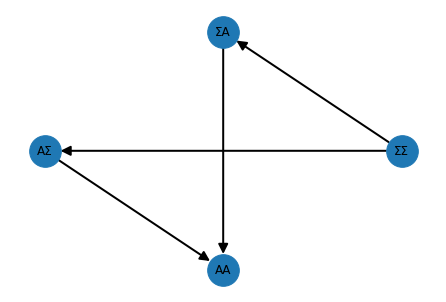

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

ND_stag_hunt = nx.DiGraph()
vlist = ['ΣΣ', 'ΣΑ', 
         'ΑΣ', 'ΑΑ' ]
elist = [('ΣΣ', 'ΑΣ'), ('ΣΣ', 'ΣΑ'),
         ('ΣΑ', 'ΑΑ'),
         ('ΑΣ', 'ΑΑ') ]
ND_stag_hunt.add_nodes_from(vlist)
ND_stag_hunt.add_edges_from(elist)
print("Stag Hunt: Δυναμική Βέλτιστης Απόκρισης")
nx.draw_circular(ND_stag_hunt, with_labels = True, width=2.0, node_size=1000, arrowsize=20)

Πέτρα - Ψαλίδι - Χαρτί: Δυναμική Βέλτιστης Απόκρισης


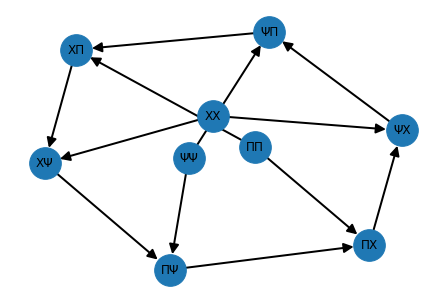

In [12]:
ND_rsp = nx.DiGraph()
vlist = ['ΠΠ', 'ΠΨ', 'ΠΧ',
         'ΨΠ', 'ΨΨ', 'ΨΧ',
         'ΧΠ', 'ΧΨ', 'ΧΧ']
elist = [('ΠΠ', 'ΠΧ'), ('ΠΠ', 'ΧΠ'),
         ('ΠΨ', 'ΠΧ'), 
         ('ΠΧ', 'ΨΧ'), 
         ('ΨΨ', 'ΠΨ'), ('ΨΨ', 'ΨΠ'),
         ('ΨΠ', 'ΧΠ'), 
         ('ΨΧ', 'ΨΠ'),
         ('ΧΧ', 'ΧΨ'), ('ΧΧ', 'ΨΧ'),
         ('ΧΠ', 'ΧΨ'), 
         ('ΧΨ', 'ΠΨ')]
ND_rsp.add_nodes_from(vlist)
ND_rsp.add_edges_from(elist)
print("Πέτρα - Ψαλίδι - Χαρτί: Δυναμική Βέλτιστης Απόκρισης")
nx.draw(ND_rsp, with_labels = True, width=2.0, node_size=1000, arrowsize=20)

### Άσκηση 2

Να απεικονίσετε με κατευθυνόμενο γράφημα, όπως παραπάνω, τη δυναμική βέλτιστης απόκριση του Διλήμματος του Φυλακισμένου, του Bach or Straviski και της μοιρασιάς 2 ευρώ. Τι συμπεραίνετε για την ύπαρξη αμιγών ισορροπιών Nash σε αυτά τα παίγνια;

# Μεικτές Στρατηγικές

[**Μεικτή στρατηγική**](https://en.wikipedia.org/wiki/Strategy_(game_theory)) ενός παίκτη είναι μια **κατανομή πιθανότητας** $\vec{p} = (p_1, \ldots, p_n)$ στο σύνολο των αμιγών στρατηγικών του παίκτη. Η έννοια της μεικτής στρατηγικής αποτελεί **γενίκευση** αυτής της αμιγούς στρατηγικής.

Σε παίγνιο 2 παικτών με πίνακες ωφέλειας $(A, B)$, η αναμενόμενη ωφέλεια με βάση το **προφίλ μεικτών στρατηγικών** $(\vec{p}, \vec{q})$ υπολογίζεται ως εξής: 
- για τον Π1 (παίκτη-γραμμή) $u_1(\vec{p}, \vec{q}) = \vec{p}^T A \vec{q}$ 
- για τον Π2 (παίκτη-στήλη) $u_2(\vec{p}, \vec{q}) = \vec{p}^T B \vec{q}$ 

Παρακάτω χρησιμοποιoύμε τη Nashpy για τον υπολογισμό της αναμενόμενης ωφέλειας των δύο παικτών στο προφίλ μεικτών στρατητικών $((1/2, 1/4, 1/4), (1/3, 1/2, 1/6))$ στο Πέτρα-Ψαλίδι-Χαρτί (βασική και γενικευμένη εκδοχή). 

In [13]:
row = np.array([1/2, 1/4, 1/4])
col = np.array([1/3, 1/2, 1/6])
print(row, col) 
print("Πέτρα - Ψαλίδι - Χαρτί, αναμενόμη ωφέλεια:\t\t", rsp[row, col])
print("Γενικευμένο Πέτρα - Ψαλίδι - Χαρτί, αναμενόμη ωφέλεια:\t", gen_rsp[row, col])

[0.5  0.25 0.25] [0.33333333 0.5        0.16666667]
Πέτρα - Ψαλίδι - Χαρτί, αναμενόμη ωφέλεια:		 [ 0.08333333 -0.08333333]
Γενικευμένο Πέτρα - Ψαλίδι - Χαρτί, αναμενόμη ωφέλεια:	 [1.04166667 0.95833333]


# Ισορροπία Nash

**Ισορροπία Nash** ([Nash equilibrium](https://en.wikipedia.org/wiki/Nash_equilibrium)) σε παίγνιο 2 παικτών είναι ένα προφίλ μεικτών στρατηγικών $(\vec{p}, \vec{q})$ όπου:
- $u_1(\vec{p}, \vec{q}) \geq u_1(\vec{p}', \vec{q})$ για κάθε μικτή στρατηγική $\vec{p}'$ του Π1, και 
- $u_2(\vec{p}, \vec{q}) \geq u_2(\vec{p}, \vec{q}')$ για κάθε μικτή στρατηγική $\vec{q}'$ του Π2.

Με άλλα λόγια, η μεικτή στρατηγική $\vec{p}$ του Π1 αποτελεί βέλτιστη απόκριση στην μεικτή στρατηγική $\vec{q}$ του Π2, και αντίστοιχα, η μεικτή στρατηγική $\vec{q}$ του Π2 αποτελεί βέλτιστη απόκριση στην μεικτή στρατηγική $\vec{p}$ του Π1. Έτσι η έννοια της ισορροπίας Nash στις μεικτές στρατηγικές γενικεύει (με άμεσο τρόπο) την έννοια της ισορροπίας Nash στις αμιγείς στρατηγικές. 

Ο παραπάνω ορισμός της ισορροπίας Nash γενικεύεται, με άμεσο τρόπο, σε παίγνια $n$ παικτών. 

O ([John Nash](https://en.wikipedia.org/wiki/John_Forbes_Nash_Jr.), 1950) απέδειξε ότι κάθε πεπερασμένο παίγνιο έχει (τουλάχιστον μία) ισορροπία Nash. 

Παρακάτω χρησιμοποιoύμε τη Nashpy για τον υπολογισμό όλων των ισορροπιών Nash στα Πέτρα-Ψαλίδι-Χαρτί (βασική και γενικευμένη εκδοχή), Δίλημμα του Φυλακισμένου, Bach or Stravinski, Stag Hunt και μοιρασιά 2 ευρώ. 

In [14]:
print("Ισορροπία Nash του Πέτρα-Ψαλίδι-Χαρτί:")
rsp_eq = rsp.support_enumeration()
for eq in rsp_eq:
    print(eq)
    
print("\nΙσορροπία Nash της γενικευμένης εκδοχής του Πέτρα-Ψαλίδι-Χαρτί:")
gen_rsp_eq = gen_rsp.support_enumeration()
for eq in gen_rsp_eq:
    print(eq)
    
print("\nΙσορροπία Nash του Διλήμματος του Φυλακισμένου:")
pd_eq = prisoners_dilemma.support_enumeration()
for eq in pd_eq:
    print(eq)
    
print("\nΙσορροπίες Nash του Bach or Stravinski:")
bos_eq = BoS.support_enumeration()
for eq in bos_eq:
    print(eq)
    
print("\nΙσορροπία Nash του Stag Hunt:")
sh_eq = stag_hunt.support_enumeration()
for eq in sh_eq:
    print(eq)
    
print("\nΙσορροπία Nash της μοιρασίας 2 ευρώ:")
print(sharing.lemke_howson(initial_dropped_label=0))

Ισορροπία Nash του Πέτρα-Ψαλίδι-Χαρτί:
(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))

Ισορροπία Nash της γενικευμένης εκδοχής του Πέτρα-Ψαλίδι-Χαρτί:
(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))

Ισορροπία Nash του Διλήμματος του Φυλακισμένου:
(array([1., 0.]), array([1., 0.]))

Ισορροπίες Nash του Bach or Stravinski:
(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667]))

Ισορροπία Nash του Stag Hunt:
(array([0., 1.]), array([0., 1.]))

Ισορροπία Nash της μοιρασίας 2 ευρώ:
(array([0.8, 0. , 0.2]), array([0.2, 0.8]))


### Άσκηση 3

Να χρησιμοποιήσετε τη Nashpy για τον υπολογισμό όλων των ισορροπιών Nash στα τρία παίγνια που επιλέξατε από τον [κατάλογο παιγνίων του Wikipedia](https://en.wikipedia.org/wiki/List_of_games_in_game_theory).

## Fictitious Play

Το [**fictitious play**](https://en.wikipedia.org/wiki/Fictitious_play) είναι ένας κανόνας εκμάθησης ισορροπιών Nash που προτάθηκε από τον ([George W. Brown](https://en.wikipedia.org/wiki/George_W._Brown_(academic)), 1949). Σε κάθε γύρο, οι παίκτες υιοθετούν (ανεξάρτητα) μια βέλτιστη αμιγή στρατηγική με βάση την μέση εμπειρική ωφέλεια των αμιγών στρατηγικών τους, όπως αυτή προκύπτει από την εμπειρική συχνότητα των στρατηγικών των άλλων παικτών στους προηγούμενους γύρους του παιγνίου. 

Η ([Julia Robinson](https://en.wikipedia.org/wiki/Julia_Robinson), 1951) απέδειξε ότι για πεπερασμένα παίγνια 2 παικτών με μηδενικό άθροισμα, οι εμπειρικές συχνότητες των στρατηγικών που επιλέγονται από τους παίκτες στο fictitious play συγκλίνουν σε ισορροπία Nash. 

Ο ([Lloyd Shapley](https://en.wikipedia.org/wiki/Lloyd_Shapley), 1964) πρότεινε τη γενικευμένη εκδοχή του Πέτρα-Ψαλίδι-Χαρτί ως απόδειξη ότι η σύγκλιση του fictitious play δεν είναι εγγυημένη σε παίγνια 2 παικτών με **μη μηδενικό άθροισμα**, όταν τόσο ο παίκτης-γραμμή όσο και ο παίκτης-στήλη έχουν τουλάχιστον 3 αμιγείς στρατηγικές. 

Παρακάτω χρησιμοποιoύμε τη Nashpy για την εφαρμογή του fictitious play στη βασική και στη γενικευμένη εκδοχή του Πέτρα-Ψαλίδι-Χαρτί και στο παίγνιο της μοιρασιάς 2 ευρώ. Τι παρατηρείτε σε σχέση με την εξέλιξη των τιμών των εμπειρικών συχνοτήτων; Σε ποιες περιπτώσεις οι εμπειρικές συχνότητες συγκλίνουν στις ισορροπίες Nash που υπολογίσαμε παραπάνω για τα αντίστοιχα παίγνια;

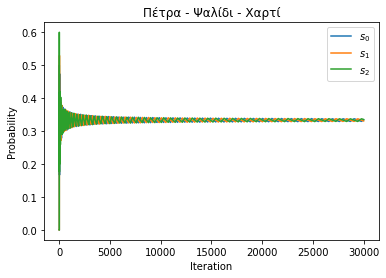

In [15]:
iterations = 30000
play_counts = tuple(rsp.fictitious_play(iterations=iterations))

plt.figure()
probabilities = [
    row_play_counts / (1+np.sum(row_play_counts))
    for row_play_counts, col_play_counts in play_counts
]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")

plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.title("Πέτρα - Ψαλίδι - Χαρτί")
plt.legend()
plt.show()

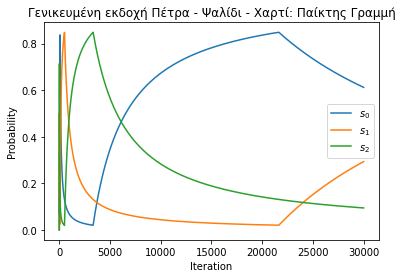

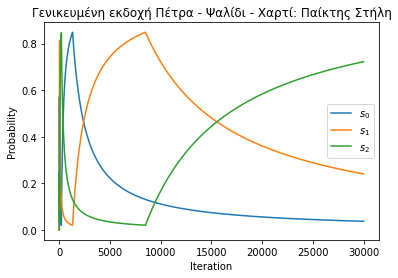

In [16]:
iterations = 30000
play_counts = tuple(gen_rsp.fictitious_play(iterations=iterations))

plt.figure()
probabilities_row = [
    row_play_counts / (1+np.sum(row_play_counts))
    for row_play_counts, col_play_counts in play_counts
]
for number, strategy in enumerate(zip(*probabilities_row)):
    plt.plot(strategy, label=f"$s_{number}$")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.title("Γενικευμένη εκδοχή Πέτρα - Ψαλίδι - Χαρτί: Παίκτης Γραμμή")
plt.legend()
plt.show()


plt.figure()
probabilities_col = [
    col_play_counts / (1+np.sum(col_play_counts))
    for row_play_counts, col_play_counts in play_counts
]
for number, strategy in enumerate(zip(*probabilities_col)):
    plt.plot(strategy, label=f"$s_{number}$")

plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.title("Γενικευμένη εκδοχή Πέτρα - Ψαλίδι - Χαρτί: Παίκτης Στήλη")
plt.legend()
plt.show()

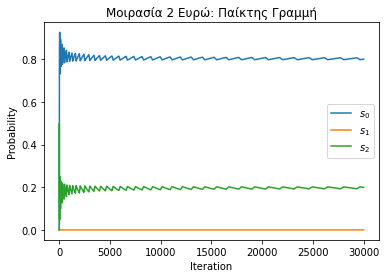

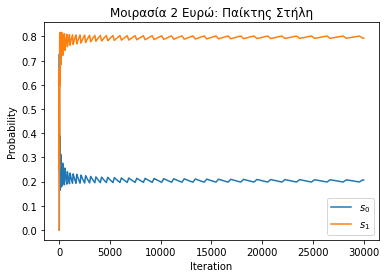

In [17]:
iterations = 30000
play_counts = tuple(sharing.fictitious_play(iterations=iterations))

plt.figure()
probabilities_row = [
    row_play_counts / (1+np.sum(row_play_counts))
    for row_play_counts, col_play_counts in play_counts
]
for number, strategy in enumerate(zip(*probabilities_row)):
    plt.plot(strategy, label=f"$s_{number}$")

plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.title("Μοιρασία 2 Ευρώ: Παίκτης Γραμμή")
plt.legend()
plt.show()

plt.figure()
probabilities_col = [
    col_play_counts / (1+np.sum(col_play_counts))
    for row_play_counts, col_play_counts in play_counts
]
for number, strategy in enumerate(zip(*probabilities_col)):
    plt.plot(strategy, label=f"$s_{number}$")

plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.title("Μοιρασία 2 Ευρώ: Παίκτης Στήλη")
plt.legend()
plt.show()

### Άσκηση 4

Να εφαρμόσετε το fictitious play, όπως παραπάνω, στο Δίλημμα του Φυλακισμένου, το Bach or Straviski και το Stag Hunt. Τι παρατηρείτε σε σχέση με την εξέλιξη των τιμών των εμπειρικών συχνοτήτων σε αυτά τα παίγνια; 

### Έλεγχος Ισορροπιών Nash

Παρακάτω χρησιμοποιούμε αφενός τη Nashpy και αφετέρου τον ορισμό της αναμενόμενης ωφέλειας των στρατηγικών των δύο παικτών ως γινόμενο των διανυσμάτων των στρατηγικών με τον αντίστοιχο πίνακα ωφέλειας, για να δείξουμε ότι το προφίλ μεικτών στρατηγικών $((0.03, 0.26, 0.71), (0.62, 0.27, 0.11))$ δεν αντιστοιχεί σε ισορροπία Nash για τη **γενικευμένη εκδοχή του Πέτρα - Ψαλίδι - Χαρτί**.

Παρατηρούμε ότι με βάση την αναμενόμενη ωφέλεια του Π1, η οποία προκύπτει από την προτεινόμενη μεικτή στρατηγική $(0.62, 0.27, 0.11)$ του Π2, η βέλτιστη απόκριση του Π1 είναι το "Χαρτί" (και μόνο), ενώ ο Π1 στην προτεινόμενη μεικτή στρατηγική $(0.03, 0.26, 0.71)$ επιλέγει με μη μηδενική πιθανότητα και τις άλλες δύο στρατηγικές "Πέτρα" και "Ψαλίδι". 

Αντίστοιχα, με βάση την αναμενόμενη ωφέλεια του Π2, η οποία προκύπτει από την προτεινόμενη μεικτή στρατηγική $(0.03, 0.26, 0.71)$ του Π1, η βέλτιστη απόκριση του Π2 είναι το "Ψαλίδι" (και μόνο), ενώ ο Π2 στην προτεινόμενη μεικτή στρατηγική $(0.62, 0.27, 0.11)$ επιλέγει με μη μηδενική πιθανότητα και τις άλλες δύο στρατηγικές "Πέτρα" και "Χαρτί". 

In [18]:
row = np.array([0.03, 0.26, 0.71])
col = np.array([0.62, 0.27, 0.11])
print((gen_rsp.payoff_matrices[0]).dot(col))
print(np.transpose((gen_rsp.payoff_matrices[1])).dot(row))
print(gen_rsp.is_best_response(row, col))

[0.65 0.84 1.51]
[1.23 1.45 0.32]
(False, False)


# Εγκατάσταση QuantEcon

Στη συνέχεια, θα δείξουμε πως μπορούμε να χρησιμοποιήσουμε τη βιβλιοθήκη **QuantEcon** για τη μελέτη παιγνίων σε κανονική μορφή και τον υπολογισμό ισορροπιών Nash. 

Αρχικά εγκαθιστούμε τη βιβλιοθήκη QuantEcon.

In [19]:
pip install quantecon

Note: you may need to restart the kernel to use updated packages.


### Ορισμός Παιγνίων στην QuantEcon

Ορίζουμε το Πέτρα-Ψαλίδι-Χαρτί (βασική και γενικευμένη εκδοχή), το Stag Hunt και τη μοιρασιά 2 ευρώ ως παίγνια δύο παικτών στην QuantEcon. Μπορείτε να δοκιμάστε να ορίσετε, με αντίστοιχο τρόπο, και τα άλλα παίγνια που είδαμε παραπάνω. 

In [20]:
import quantecon as qe
from quantecon import game_theory as gt

rsp_bimatrix = [[(0, 0), (1, -1), (-1, 1)], 
                [(-1, 1), (0, 0), (1, -1)], 
                [(1, -1), (-1, 1), (0, 0)]]
rsp_qe = gt.NormalFormGame(rsp_bimatrix)
print("Πέτρα - Ψαλίδι - Χαρτί")
print(rsp_qe)

gen_rsp_bimatrix = [[(0, 0), (2, 1), (1, 2)], 
                    [(1, 2), (0, 0), (2, 1)], 
                    [(2, 1), (1, 2), (0, 0)]]
gen_rsp_qe = gt.NormalFormGame(gen_rsp_bimatrix)
print("\nΓενικευμένη εκδοχή του Πέτρα - Ψαλίδι - Χαρτί")
print(gen_rsp_qe)

stag_hunt_bimatrix = [[(2, 2), (0, 3)], 
                      [(3, 0), (1, 1)]] 
stag_hunt_qe = gt.NormalFormGame(stag_hunt_bimatrix)
print("\nΚοινωνική Συνεργασία - Stag Hunt")
print(stag_hunt_qe)

sharing_bimatrix = [[(2, 0), (0, 0.5)], 
                    [(1, 1), (0, 0)], 
                    [(0, 2), (0.5, 0)]]
sharing_qe = gt.NormalFormGame(sharing_bimatrix)
print("\nΜοιρασιά 2 ευρώ")
print(sharing_qe)

Πέτρα - Ψαλίδι - Χαρτί
2-player NormalFormGame with payoff profile array:
[[[ 0,  0],  [ 1, -1],  [-1,  1]],
 [[-1,  1],  [ 0,  0],  [ 1, -1]],
 [[ 1, -1],  [-1,  1],  [ 0,  0]]]

Γενικευμένη εκδοχή του Πέτρα - Ψαλίδι - Χαρτί
2-player NormalFormGame with payoff profile array:
[[[0, 0],  [2, 1],  [1, 2]],
 [[1, 2],  [0, 0],  [2, 1]],
 [[2, 1],  [1, 2],  [0, 0]]]

Κοινωνική Συνεργασία - Stag Hunt
2-player NormalFormGame with payoff profile array:
[[[2, 2],  [0, 3]],
 [[3, 0],  [1, 1]]]

Μοιρασιά 2 ευρώ
2-player NormalFormGame with payoff profile array:
[[[2. , 0. ],  [0. , 0.5]],
 [[1. , 1. ],  [0. , 0. ]],
 [[0. , 2. ],  [0.5, 0. ]]]


### Αμιγείς Ισορροπίες Nash με την QuantEcon

Υπολογίζουμε τις αμιγείς ισορροπίες Nash για το Πέτρα-Ψαλίδι-Χαρτί (βασική και γενικευμένη εκδοχή), το Stag Hunt και τη μοιρασιά 2 ευρώ με την QuantEcon. Μπορείτε να δοκιμάστε να υπολογίσετε τις αμιγείς ισορροπίες Nash, με αντίστοιχο τρόπο, και για τα άλλα παίγνια που είδαμε παραπάνω. 

In [21]:
print("Αμιγείς ισορροπίες Nash του Πέτρα - Ψαλίδι - Χαρτί:", gt.pure_nash_brute(rsp_qe))
print("Αμιγείς ισορροπίες Nash της γενικευμένης εκδοχής του Πέτρα - Ψαλίδι - Χαρτί:", gt.pure_nash_brute(gen_rsp_qe))
print("Αμιγείς ισορροπίες Nash της Κοινωνικής Συνεργασίας - Stag Hunt:", gt.pure_nash_brute(stag_hunt_qe))
print("Αμιγείς ισορροπίες Nash της μοιρασίας 2 ευρώ:", gt.pure_nash_brute(sharing_qe))

Αμιγείς ισορροπίες Nash του Πέτρα - Ψαλίδι - Χαρτί: []
Αμιγείς ισορροπίες Nash της γενικευμένης εκδοχής του Πέτρα - Ψαλίδι - Χαρτί: []
Αμιγείς ισορροπίες Nash της Κοινωνικής Συνεργασίας - Stag Hunt: [(1, 1)]
Αμιγείς ισορροπίες Nash της μοιρασίας 2 ευρώ: []


### Ισορροπίες Nash με την QuantEcon

Υπολογίζουμε όλες τις ισορροπίες Nash για το Πέτρα-Ψαλίδι-Χαρτί (βασική και γενικευμένη εκδοχή), το Stag Hunt και τη μοιρασιά 2 ευρώ με την QuantEcon. Μπορείτε να δοκιμάστε να υπολογίσετε όλες τις ισορροπίες Nash, με αντίστοιχο τρόπο, και για τα άλλα παίγνια που είδαμε παραπάνω. 

In [22]:
print("Ισορροπία Nash του Πέτρα - Ψαλίδι - Χαρτί:\n", gt.support_enumeration(rsp_qe))
print("\nΙσορροπία Nash της γενικευμένης εκδοχής του Πέτρα - Ψαλίδι - Χαρτί:\n", gt.support_enumeration(gen_rsp_qe))
print("\nΙσορροπία Nash της Κοινωνικής Συνεργασίας - Stag Hunt:\n", gt.support_enumeration(stag_hunt_qe))
print("\nΙσορροπία Nash της μοιρασίας 2 ευρώ:\n", gt.support_enumeration(sharing_qe))

Ισορροπία Nash του Πέτρα - Ψαλίδι - Χαρτί:
 [(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))]

Ισορροπία Nash της γενικευμένης εκδοχής του Πέτρα - Ψαλίδι - Χαρτί:
 [(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))]

Ισορροπία Nash της Κοινωνικής Συνεργασίας - Stag Hunt:
 [(array([0., 1.]), array([0., 1.]))]

Ισορροπία Nash της μοιρασίας 2 ευρώ:
 [(array([0.8, 0. , 0.2]), array([0.2, 0.8]))]


### Έλεγχος Ισορροπιών Nash με την QuantEcon

Παρακάτω χρησιμοποιούμε αφενός τηn QuantEcon και αφετέρου τον ορισμό της αναμενόμενης ωφέλειας των στρατηγικών των δύο παικτών ως γινόμενο των διανυσμάτων των στρατηγικών με τον αντίστοιχο πίνακα ωφέλειας, για να δείξουμε ότι το προφίλ μεικτών στρατηγικών $((0.03, 0.26, 0.71), (0.62, 0.27, 0.11))$ δεν αντιστοιχεί σε ισορροπία Nash για τη **γενικευμένη εκδοχή του Πέτρα - Ψαλίδι - Χαρτί**.

In [23]:
row = np.array([0.03, 0.26, 0.71])
col = np.array([0.62, 0.27, 0.11])

print((gen_rsp_qe.players[0].payoff_array).dot(col))
print((gen_rsp_qe.players[1].payoff_array).dot(row))
print(gen_rsp_qe.is_nash((row, col)))

[0.65 0.84 1.51]
[1.23 1.45 0.32]
False
